# 1. EDA
## Data load



In [1]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('cs_data.csv', index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
data['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [6]:
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [7]:
data['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

## 각 항목별 상관관계 분석

In [8]:
# data column별 상관관계 분석
df_corr = data.corr()
df_corr

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


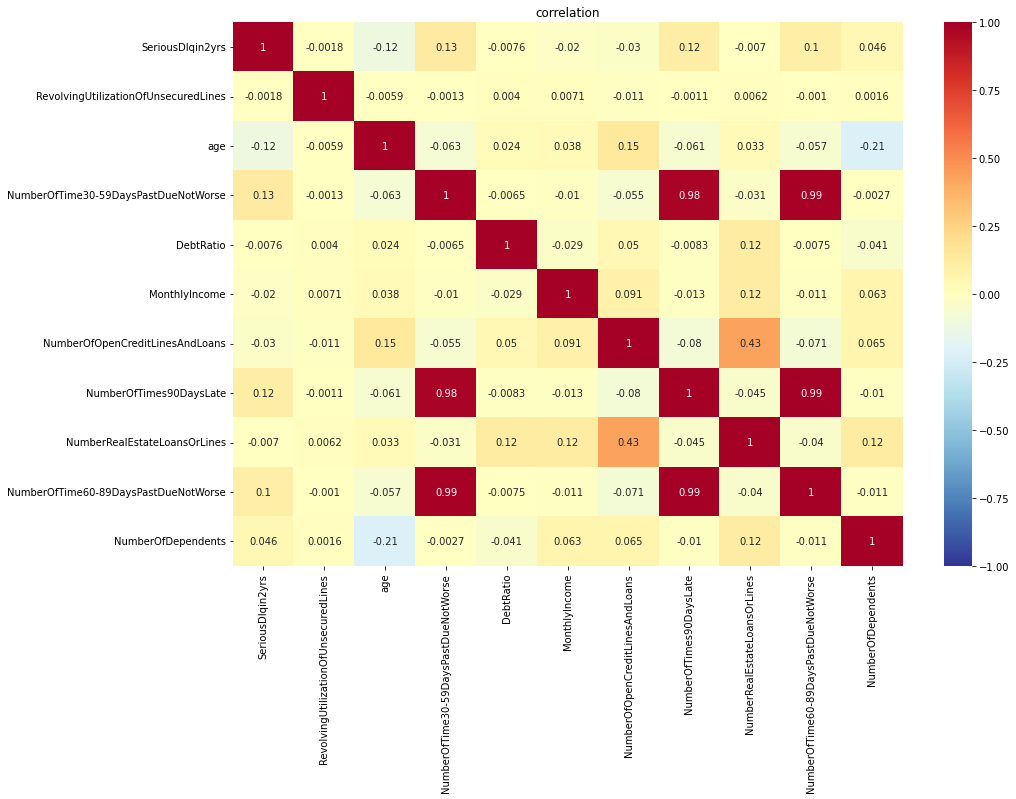

In [9]:
plt.figure(figsize=(15, 10))
plt.title('correlation')
sns.heatmap(df_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

### **Analysis**
각 요소들의 상관관계에 관한 heatmap은 위의 그림과 같다. 

구체적으로 최근 2년 동안 30 ~ 59일 연차한 횟수(NumberOfTime30-59DaysPastDueNotWorse)는 각각 과거 90일 이상 연체한 횟수(NumberOfTimes90DaysLate)와 최근 2년간 60 ~ 89일 연체한 횟수(NumberOfTime60-89DaysPastDueNotWorse)가 **0.98**과 **0.99**로 당연하게도 높은 상관 관계를 보였다.

다음으로 최근 2년간 60 ~ 89일 연체한 횟수 (NumberOfTime60-89DaysPastDueNotWorse)와 과거 90일 이상 연체한 횟수(NumberOfTimes90DaysLate) 또한 **0.99**정도로 높은 상관 관계를 보였다.

양의 상관 관계에서 마지막으로 주택 담보대출을 포함한 부동산 담보 대출 건수(NumberRealEstateLoansOrLines)와 대출자가 보유중인 담보 대출 및 신용 대출 건수(NumberOfOpenCreditLinesAndLoans)가 **0.43** 정도의 상관 관계를 보였다.

마지막으로 음의 상관 관계는 대출자를 제외한 부양가족 수 (NumberOfDependents)와 나이(age)가 **-0.21**를 보였는데, 이는 직관적으로 이해가 되지 않아 데이터를 더 확인해 보면서 파악할 예정이다.

## DebtRatio Boxplot

In [10]:
data['DebtRatio'].value_counts()

0.000000    4113
1.000000     229
4.000000     174
2.000000     170
3.000000     162
            ... 
0.367271       1
0.037634       1
0.755290       1
0.457568       1
0.656276       1
Name: DebtRatio, Length: 114194, dtype: int64

In [11]:
data[data['DebtRatio'] > 1].value_counts()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio    MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
1                 3818.000000                           39   2                                     1.154265     3668.0         12                               1                        2                             0                                     0.0                   1
0                 0.105818                              72   0                                     1.668262     626.0          10                               0                        0                             0                                     1.0                   1
                  0.102986                              45   0                                     2431.000000  0.0            6                                0             

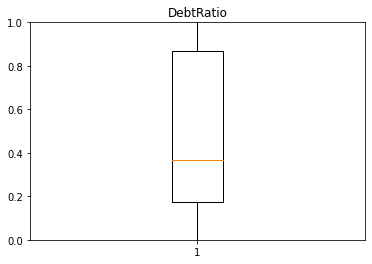

In [12]:
plt.boxplot(data['DebtRatio'])
plt.title('DebtRatio')
plt.ylim(0, 1)
plt.show()

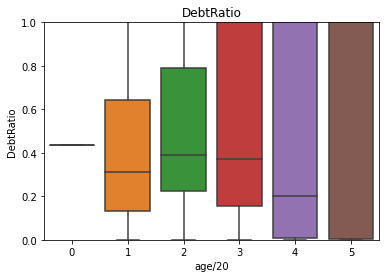

In [13]:
data_sample = data.copy()
data_sample['age/20'] = data_sample[['age']].applymap(lambda x : int(x/20))
sns.boxplot(x='age/20', y='DebtRatio', data=data_sample)
plt.title('DebtRatio')
plt.ylim(0, 1)
plt.show()

## RevolvingUtilizationOfUnsecuredLines Boxplot

In [14]:
data['RevolvingUtilizationOfUnsecuredLines'].value_counts()

0.000000    10878
1.000000    10256
1.000000       17
0.950100        8
0.713147        6
            ...  
0.486200        1
0.039377        1
0.030780        1
0.355181        1
0.168611        1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 125728, dtype: int64

In [15]:
data[data['RevolvingUtilizationOfUnsecuredLines'] > 1].value_counts()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
1                 6190.000000                           27   0                                     0.478532   1280.0         6                                0                        0                             1                                     1.0                   1
0                 1.068493                              25   1                                     0.129968   4100.0         2                                0                        0                             0                                     0.0                   1
                  1.069572                              45   0                                     0.019954   4810.0         2                                0                     

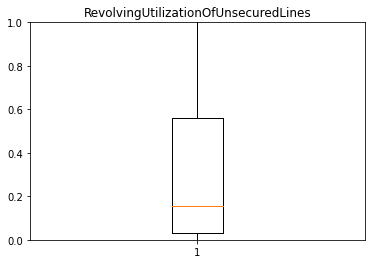

In [16]:
plt.boxplot(data['RevolvingUtilizationOfUnsecuredLines'])
plt.title('RevolvingUtilizationOfUnsecuredLines')
plt.ylim(0, 1)
plt.show()

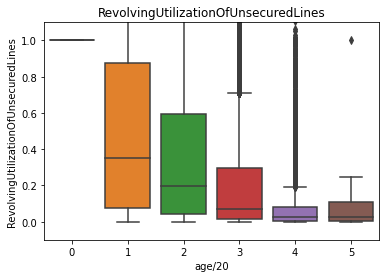

In [17]:
data_sample = data.copy()
data_sample['age/20'] = data_sample[['age']].applymap(lambda x : int(x/20))
sns.boxplot(x='age/20', y='RevolvingUtilizationOfUnsecuredLines', data=data_sample)
plt.title('RevolvingUtilizationOfUnsecuredLines')
plt.ylim(-0.1, 1.1)
plt.show()

## 전체 나이 분포 확인 (Pie chart)

In [18]:
age_df = pd.DataFrame(data.age)
age_df.head()

,age
1,45
2,40
3,38
4,30
5,49


In [19]:
# 20살 단위로 group화
age_df['age/20'] = age_df[['age']].applymap(lambda x : int(x/20))
age_df_count = age_df.groupby(['age/20'])['age/20'].count()
age_df_count.index = ['age<20', '20<=age<40', '40<=age<60', '60<=age<80', '80<=age<100', '100<=age']
age_df_count.column = ['count']
age_df_count

age<20             1
20<=age<40     32003
40<=age<60     69678
60<=age<80     42506
80<=age<100     5799
100<=age          13
Name: age/20, dtype: int64

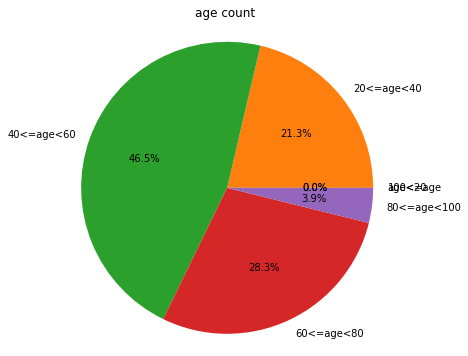

In [20]:
# data visualization
plt.figure(figsize=(7, 6))
plt.pie(age_df_count.values, labels=age_df_count.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('age count')
plt.show()

### **Analysis**
전체적인 나이 분포를 확인해본 결과, 40 ~ 60살 정도가 46.5% 이상의 높은 비율을 가지고 있었고 다음으로 60 ~ 80살이 28.3%로 40살 이상에서 약 75%가 넘는 분포를 가지고 있었다. 그 다음으로 20 ~ 40살 정도에서 약 21%의 비율을 차지했음을 알 수 있었다.



## 최근 2년 동안 90일 이상 연체 여부 데이터 분석 (SeriousDlqin2yrs / Violin Plot)

In [21]:
# SeriousDlqin2yrs
df_SeriousDlqin2yrs = pd.DataFrame(data.SeriousDlqin2yrs)
df_SeriousDlqin2yrs.head()

,SeriousDlqin2yrs
1,1
2,0
3,0
4,0
5,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


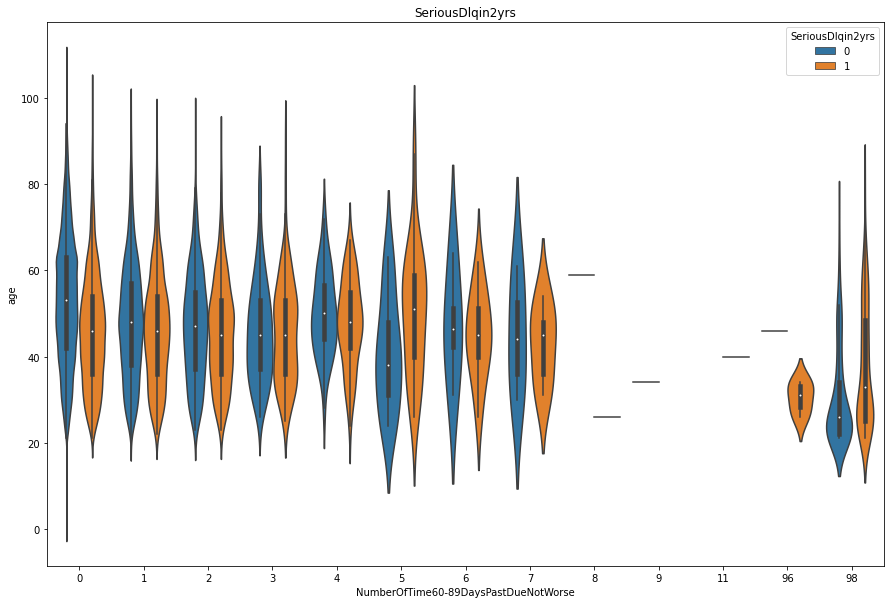

In [22]:
plt.figure(figsize=(15, 10))
sns.violinplot('NumberOfTime60-89DaysPastDueNotWorse', 'age', hue='SeriousDlqin2yrs', data=data)
plt.title('SeriousDlqin2yrs')
plt.show()

In [23]:
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

### **Analysis**
violin plot을 이용하여 최근 2년간 60 ~ 89일 연체한 횟수에 따른 2년 동안 90일 이상 연체 여부를 파악해보려고 했다. 하지만 위의 그림과 같이 60 ~ 89일 연체한 횟수에 대해 이상치 (outlier)로 보이는 것이 탐지가 되었다.

이를 value_counts()를 통해서 다시 본 결과, 2년간 연체한 횟수가 98, 96번이라는 답변이 **264명과 5명**으로 조사되어 있다는 것을 파악했다. 이에 대한 값을 아예 **삭제를 할 것인지, 아니면 값을 대체할 지를** 결정이 필요해 보인다.

## 결측치 파악

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [25]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### **Analysis**
결측치 (NA)에 대한 분석이다. 총 2개의 요소에서 결측치가 발생했다. (MonthlyIncome, NumberOfDependents) 특히, 월 수입에 대한 결측치는 거의 3만개에 가까운 숫자이기에 삭제하기에는 무리가 있다고 판단되었다. 그리고 부양 가족의 수도 그냥 삭제하기 보다는 데이터 전체의 평균 등으로 대체하여 사용할 예정이다.

구체적으로 위의 상관 관계(heat map)에서 볼 수 있듯이, MonthlyIncome은 NumberRealEstateLoansOrLines에서 그나마 높은 상관 관계를 가지기에 각 값 별로 가지고 있는 월 평균 수입을 MonthlyIncome 값으로 대체할 예정이다.

다음으로 NumberOfDependents의 경우, age와 음의 상관 관계이지만 관련성이 높아 보이므로 나이대에 따른 NumberOfDependents를 적용하거나 삭제할 예정이다.

## Data preprocessing
### 결측치 처리 : NumberOfDependents

In [81]:
data.shape

(150000, 11)

In [82]:
data_1 = data.copy()
data_1.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [83]:
data_1['age/10'] = data_1[['age']].applymap(lambda x : int(x/10))
data_1.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age/10
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,4
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,4
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,3
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,3
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,4


In [84]:
mean_df = data_1['NumberOfDependents'].groupby(data_1['age/10']).mean()
mean_df
# data_1.NumberOfDependents.mean()

age/10
0     2.000000
2     0.293748
3     0.928793
4     1.303160
5     0.849615
6     0.363403
7     0.187539
8     0.114765
9     0.086331
10    0.100000
Name: NumberOfDependents, dtype: float64

In [85]:
# NumberOfDependents의 결측치 채우기
# data_1.loc[(data_1['NumberOfDependents'].isnull()), 'NumberOfDependents'] = int(data_1.NumberOfDependents.mean())
for j in range(0, 11):
  for i in mean_df:
    data_1.loc[(data_1['NumberOfDependents'].isnull()) & (data_1['age/10'] == round(j)),
               'NumberOfDependents'] = i

In [86]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
 11  

In [87]:
data_1.drop('age/10', axis=1, inplace=True)
data_1.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 결측치 처리 : MonthlyIncome

In [88]:
data_1['NumberRealEstateLoansOrLines'].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
32        1
21        1
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [89]:
mean_df = data_1['MonthlyIncome'].groupby(data_1['NumberRealEstateLoansOrLines']).mean()
mean_df, mean_df.shape

(NumberRealEstateLoansOrLines
 0      4865.215082
 1      6714.410023
 2      8140.706147
 3      9764.082914
 4     12528.724307
 5     13589.894017
 6     14366.163121
 7     14794.359155
 8     13578.341772
 9     14014.250000
 10    12604.000000
 11    15128.062500
 12    18452.588235
 13    23457.500000
 14    18260.142857
 15     9257.200000
 16    90507.000000
 17    29448.000000
 18    10000.000000
 19    20000.000000
 20    21507.000000
 21    33334.000000
 23    14500.000000
 25    35133.333333
 26    48000.000000
 29    55966.000000
 32    70000.000000
 54     8000.000000
 Name: MonthlyIncome, dtype: float64, (28,))

In [90]:
# MonthlyIncome 결측치 채우기
# data_1['MonthlyIncome'].mean()
# data_1.loc[(data_1['MonthlyIncome'].isnull()), 'MonthlyIncome'] = data_1['MonthlyIncome'].mean()
for j in range(0, 32):
  for i in mean_df:
    data_1.loc[(data_1['MonthlyIncome'].isnull()) & (data_1['NumberRealEstateLoansOrLines'] == j),
               'MonthlyIncome'] = i

In [91]:
mean_df = data_1['MonthlyIncome'].groupby(data_1['NumberRealEstateLoansOrLines']).mean()
mean_df, mean_df.shape

(NumberRealEstateLoansOrLines
 0      4865.215082
 1      6339.327798
 2      7634.034793
 3      9038.583916
 4     11359.774282
 5     12272.961348
 6     13237.925541
 7     13110.469224
 8     12266.688292
 9     12372.115527
 10    11767.374603
 11    12004.587199
 12    17697.734171
 13    22218.014339
 14    18260.142857
 15     8002.347166
 16    90507.000000
 17    23302.303770
 18     7432.607541
 19    20000.000000
 20    21507.000000
 21    33334.000000
 23     9682.607541
 25    35133.333333
 26    48000.000000
 29    55966.000000
 32    70000.000000
 54     8000.000000
 Name: MonthlyIncome, dtype: float64, (28,))

In [92]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

### Result
NumberOfDependents와 MonthlyIncome의 결측치를 위와 같이 다 채우는 방향으로 진행하였다.

구체적으로 NumberOfDependents의 경우에는 age를 20살 기준으로 나누어 각 평균값을 구하고, 각 나이가 해당되는 연령의 결측치에 평균값으로 채웠다.

다음으로 MonthlyIncome는 앞서 언급한 대로 NumberRealEstateLoansOrLines의 숫자를 살펴보았고, 각 대출 건수에 대한 MonthlyIncome 평균값을 구했다. 이를 각 해당하는 대출 건수에 대한 결측치를 채웠다.

## Remove Outlier (이상치 제거)

In [93]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

### 이상치 제거 : RevolvingUtilizationOfUnsecuredLines

- Data의 속성상 **1** 이상의 숫자는 이상치라고 판단하여, 1.0 이상의 숫자를 삭제함

In [94]:
data_1[data_1['RevolvingUtilizationOfUnsecuredLines'] > 1.0].value_counts()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio     MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
1                 8328.000000                           39   0                                     21395.000000  4865.215082    9                                0                        2                             1                                     0.0                   1
0                 1.079622                              54   1                                     0.950224      4238.000000    7                                0                        2                             0                                     1.0                   1
                  1.080975                              63   1                                     6.293796      2739.000000    9                                0         

In [95]:
data_del_idx = data_1[(data['RevolvingUtilizationOfUnsecuredLines'] > 1.0)].index
data_1.drop(data_del_idx, inplace=True)
data_del_idx.shape, data_1.shape

((3321,), (146679, 11))

In [41]:
data_1[data_1['RevolvingUtilizationOfUnsecuredLines'] > 1.0].value_counts()

Series([], dtype: int64)

### 이상치 제거 : DebtRatio

- Data의 속성상 **1** 이상의 숫자는 이상치라고 판단하여, 1.0 이상의 숫자를 삭제함

In [72]:
# data_1[data_1['DebtRatio'] > 1].value_counts()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
0                 0.000000                              24   0                                     520.0      4865.215082    2                                0                        0                             0                                     0.0                   3
                  1.000000                              22   0                                     24.0       4865.215082    0                                0                        0                             0                                     0.0                   2
                                                                                                   7.0        4865.215082    0                                0                     

In [73]:
# data_del_idx = data_1[(data['DebtRatio'] > 1.0)].index
# data_1.drop(data_del_idx, inplace=True)
# data_del_idx.shape, data_1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


((34388,), (112022, 11))

In [74]:
# data_1.shape

(112022, 11)

### 이상치 제거  : NumberOfTime60-89DaysPastDueNotWorse

- 위에서 확인한 것과 같이 96번과 98번 연체 횟수는 기간적 측면에서 볼 때 말이 되지 않는 값이라 outlier로 판단하고 데이터의 수 측면에서 크지 않다고 생각되어 삭제한다.

In [96]:
# 삭제할 index 추출 & 삭제
data_del_idx = data_1[(data_1['NumberOfTime60-89DaysPastDueNotWorse'] == 98) | (data_1['NumberOfTime60-89DaysPastDueNotWorse'] == 96)].index
data_1.drop(data_del_idx, inplace=True)
data_del_idx.shape, data_1.shape

((269,), (146410, 11))

In [97]:
# 결과 확인
data_1['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     139990
1       5158
2        892
3        242
4         79
5         26
6         13
7          6
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [47]:
# mean_df = data_1['MonthlyIncome'].groupby(data_1['NumberRealEstateLoansOrLines']).mean()
# mean_df

In [98]:
data_1['SeriousDlqin2yrs'].value_counts(), data_1.shape

(0    137768
 1      8642
 Name: SeriousDlqin2yrs, dtype: int64, (146410, 11))

In [100]:
# 삭제할 index 추출 & 삭제
data_del_idx = data_1[(data_1['age'] == 0)].index
data_1.drop(data_del_idx, inplace=True)
data_del_idx.shape, data_1.shape

((1,), (146409, 11))

### Result
NumberOfTime60-89DaysPastDueNotWorse에 대한 이상치 제거, NumberRealEstateLoansOrLines에 54건수에 대한 데이터가 이상치로 보이지만 큰 영향은 안 줄 것으로 판단하고 진행

In [101]:
data_1.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,146409.000000,146409.000000,146409.000000,146409.000000,146409.000000,1.464090e+05,146409.000000,146409.000000,146409.000000,146409.000000,146409.000000
mean,0.059026,0.302498,52.515631,0.228312,356.091560,6.342242e+03,8.515453,0.078042,1.027731,0.056486,0.786796
std,0.235675,0.336877,14.744832,0.665226,2057.676356,1.303666e+04,5.150571,0.440820,1.132093,0.303015,1.116358
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028515,42.000000,0.000000,0.175915,3.958000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.143716,52.000000,0.000000,0.366998,4.865215e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.516929,63.000000,0.000000,0.871876,7.434000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


# 2. Base line model
## Import

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, plot_confusion_matrix, roc_auc_score

In [51]:
def print_metrics_classifier(y, pred, title=None):
    """
    accuracy, recall, precision, f1 출력하는 함수
    [parameter]
    y : target (ndarray)
    pred : prediction (ndarray)
    title : (str)
    [Return]
    [Exception]
    """
    if title:
      print(title)
    print('정확도(Accuracy): ', accuracy_score(y, pred))
    print('재현률(Recall): ', recall_score(y, pred))
    print('정밀도(Precision): ', precision_score(y, pred))
    print('f1 score: ', f1_score(y, pred))
    print('roc_auc_score', roc_auc_score(y, pred))
    print()

### 결측치 있는 열 그대로 삭제 후 적용

In [52]:
data_0 = data.copy()
data_0.dropna(axis=0, inplace=True)

X = data_0.drop('SeriousDlqin2yrs', axis=1)
y = data_0['SeriousDlqin2yrs']
# X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=157,
                                                    stratify=y
                                                    )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2,
                                                  random_state=157,
                                                  stratify=y_train
                                                  )

X_train.shape, X_val.shape, X_test.shape

((76972, 10), (19243, 10), (24054, 10))

In [53]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120269 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 2   age                                   120269 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 4   DebtRatio                             120269 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 7   NumberOfTimes90DaysLate               120269 non-null  int64  
 8   NumberRealEstateLoansOrLines          120269 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
 10  NumberOfDependents                    120269 non-null  float64
dtype

In [54]:
model = DecisionTreeClassifier(max_depth=8, random_state=157)
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_val = model.predict(X_val)
pred_test = model.predict(X_test)

print_metrics_classifier(y_train, pred_train, 'train')
print_metrics_classifier(y_val, pred_val, 'validation')
print_metrics_classifier(y_test, pred_test, 'test')

train
정확도(Accuracy):  0.9395884217637582
재현률(Recall):  0.20228080014956065
정밀도(Precision):  0.7385665529010239
f1 score:  0.317581449955973
roc_auc_score 0.5984666779464137

validation
정확도(Accuracy):  0.932806734916593
재현률(Recall):  0.15108451757666416
정밀도(Precision):  0.5611111111111111
f1 score:  0.2380671773718326
roc_auc_score 0.5711303298259731

test
정확도(Accuracy):  0.932111083395693
재현률(Recall):  0.13824057450628366
정밀도(Precision):  0.5448113207547169
f1 score:  0.2205250596658711
roc_auc_score 0.5648089795642708



### 결측치 Preprocessing 적용한 Data 활용

In [102]:
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.under_sampling import TomekLinks, CondensedNearestNeighbour

In [103]:
X = data_1.drop('SeriousDlqin2yrs', axis=1)
y = data_1['SeriousDlqin2yrs']
X.shape, y.shape

((146409, 10), (146409,))

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=157,
                                                    stratify=y
                                                    )
# cnn = CondensedNearestNeighbour()
# X_train, y_train = cnn.fit_resample(X_train, y_train)

# tl = TomekLinks()
# X_train, y_train = tl.fit_resample(X_train, y_train)

smt = SMOTE(random_state=157)
X_train, y_train = smt.fit_resample(X_train, y_train)
# X.shape, y.shape

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2,
                                                  random_state=157,
                                                  stratify=y_train
                                                  )

X_train.shape, X_val.shape, X_test.shape

((176340, 10), (44086, 10), (29282, 10))

In [58]:
# ros = RandomOverSampler(random_state=157)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# X_train.shape, y_train.shape

# smt = SMOTE(random_state=157)
# X_train, y_train = smt.fit_resample(X_train, y_train)
# X_train.shape, y_train.shape

# ass = ADASYN(random_state=157)
# X_train, y_train = ass.fit_resample(X_train, y_train)
# X_train.shape, y_train.shape

In [105]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [106]:
tree = DecisionTreeClassifier(max_depth=7, random_state=157)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)
pred_test = tree.predict(X_test)

print_metrics_classifier(y_train, pred_train, 'tree train')
print_metrics_classifier(y_val, pred_val, 'tree validation')
print_metrics_classifier(y_test, pred_test, 'tree test')

tree train
정확도(Accuracy):  0.8320460474084156
재현률(Recall):  0.816298060564818
정밀도(Precision):  0.8428442612392116
f1 score:  0.8293587919084137
roc_auc_score 0.8320460474084156

tree validation
정확도(Accuracy):  0.8287891847752121
재현률(Recall):  0.8145896656534954
정밀도(Precision):  0.8383994023439324
f1 score:  0.826323055683387
roc_auc_score 0.828789184775212

tree test
정확도(Accuracy):  0.8318762379618878
재현률(Recall):  0.5520833333333334
정밀도(Precision):  0.18694885361552027
f1 score:  0.2793148880105402
roc_auc_score 0.7007531423144856



In [107]:
fi = pd.Series(tree.feature_importances_, index=X.columns)
fi

RevolvingUtilizationOfUnsecuredLines    0.482331
age                                     0.003784
NumberOfTime30-59DaysPastDueNotWorse    0.018003
DebtRatio                               0.005384
MonthlyIncome                           0.008810
NumberOfOpenCreditLinesAndLoans         0.004244
NumberOfTimes90DaysLate                 0.054112
NumberRealEstateLoansOrLines            0.006180
NumberOfTime60-89DaysPastDueNotWorse    0.000347
NumberOfDependents                      0.416806
dtype: float64

In [108]:
rf = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=157)
rf.fit(X_train, y_train)

pred_train = rf.predict(X_train)
pred_val = rf.predict(X_val)
pred_test = rf.predict(X_test)

print_metrics_classifier(y_train, pred_train, 'RandomForest train')
print_metrics_classifier(y_val, pred_val, 'RandomForest validation')
print_metrics_classifier(y_test, pred_test, 'RandomForest test')

RandomForest train
정확도(Accuracy):  0.7695191108086651
재현률(Recall):  0.8345242145854599
정밀도(Precision):  0.7385103329218231
f1 score:  0.7835870566497872
roc_auc_score 0.7695191108086651

RandomForest validation
정확도(Accuracy):  0.768951594610534
재현률(Recall):  0.8350043097581998
정밀도(Precision):  0.7375676217190944
f1 score:  0.7832673730797054
roc_auc_score 0.768951594610534

RandomForest test
정확도(Accuracy):  0.71040229492521
재현률(Recall):  0.7528935185185185
정밀도(Precision):  0.13908488347231132
f1 score:  0.23479516332791917
roc_auc_score 0.7303155260444809



In [109]:
fi = pd.Series(rf.feature_importances_, index=X.columns)
fi

RevolvingUtilizationOfUnsecuredLines    0.494451
age                                     0.056102
NumberOfTime30-59DaysPastDueNotWorse    0.100999
DebtRatio                               0.005909
MonthlyIncome                           0.003011
NumberOfOpenCreditLinesAndLoans         0.004282
NumberOfTimes90DaysLate                 0.113828
NumberRealEstateLoansOrLines            0.025212
NumberOfTime60-89DaysPastDueNotWorse    0.015160
NumberOfDependents                      0.181046
dtype: float64

In [64]:
# lr = LogisticRegression(random_state=157)
# lr.fit(X_train_scaled, y_train)

# pred_train = lr.predict(X_train_scaled)
# pred_val = lr.predict(X_val_scaled)
# pred_test = lr.predict(X_test_scaled)

# print_metrics_classifier(y_train, pred_train, 'LogisticRegression train')
# print_metrics_classifier(y_val, pred_val, 'LogisticRegression validation')
# print_metrics_classifier(y_test, pred_test, 'LogisticRegression test')

In [65]:
# knn = KNeighborsClassifier()
# knn.fit(X_train_scaled, y_train)

# pred_train = knn.predict(X_train_scaled)
# pred_val = knn.predict(X_val_scaled)
# pred_test = knn.predict(X_test_scaled)

# print_metrics_classifier(y_train, pred_train, 'K-NN train')
# print_metrics_classifier(y_val, pred_val, 'K-NN validation')
# print_metrics_classifier(y_test, pred_test, 'K-NN test')

In [66]:
# svc = SVC()
# svc.fit(X_train_scaled, y_train)

# pred_train = svc.predict(X_train_scaled)
# pred_val = svc.predict(X_val_scaled)
# pred_test = svc.predict(X_test_scaled)

# print_metrics_classifier(y_train, pred_train, 'SVC train')
# print_metrics_classifier(y_val, pred_val, 'SVC validation')
# print_metrics_classifier(y_test, pred_test, 'SVC test')

## Hyper-parameter Tuning